### `ROC-AUC Curve for Binary Classification`

In [1]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [2]:
# generate two class dataset
X, y = make_classification(n_samples=1000,n_classes=2,n_features=20,random_state=27)

In [3]:
# split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

In [5]:
# import models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [8]:
# Logistic Regression
model1 = LogisticRegression()

# K Nearest Neighbour
model2 = KNeighborsClassifier(n_neighbors=4)

In [9]:
# fit model

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [10]:
# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

In [11]:
from sklearn.metrics import roc_curve

# Sklearn has a very potent method, roc_curve(), which computes the ROC for your classifier in a matter of seconds! It returns the FPR, TPR, and threshold values.

In [12]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

In [13]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.9762374461979914 0.9233769727403157


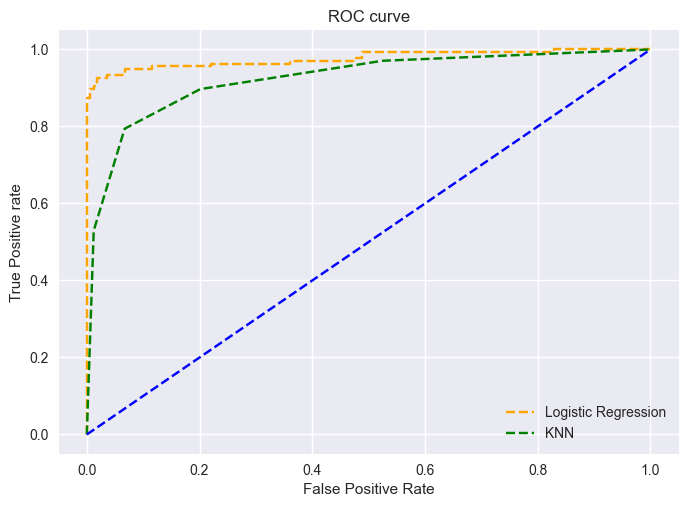

In [15]:

# matplotlib
import matplotlib.pyplot as plt


# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### `AUC-ROC Curve for Multi-Class Classification`(Optional)

In [ ]:
#The AUC-ROC curve is only for binary classification problems. But we can extend it to multiclass classification problems using the One vs. All technique.

#So, if we have three classes, 0, 1, and 2, the ROC for class 0 will be generated as classifying 0 against not 0, i.e., 1 and 2. The ROC for class 1 will be generated as classifying 1 against not 1, and so on.

#The ROC curve for multi-class classification models can be determined as below:

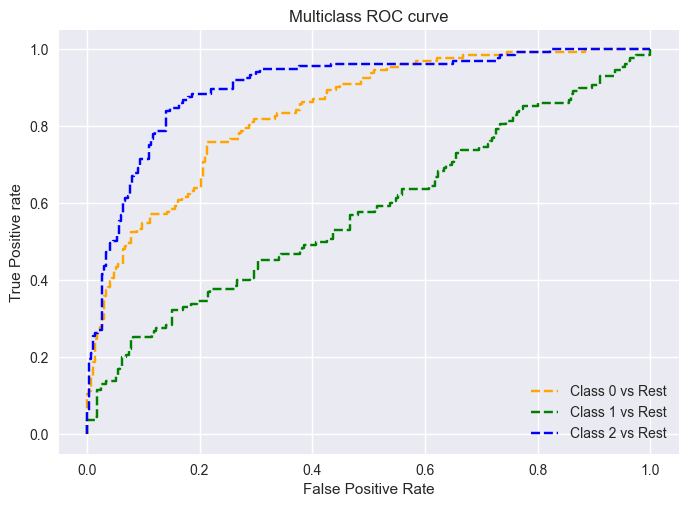

In [16]:
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=3, n_features=20, n_informative=3, random_state=42)

# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# fit model
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    